In [1]:
from hypers import Params

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import ttest_ind

dataset = "credit"
params = Params.read_hyperparameters(
    f"/home/leandrosobral/LeandroSobralThesis/ProtoGain/{dataset}/parameters.json"
)

{'input': '/home/leandrosobral/LeandroSobralThesis/ProtoGain/credit/creditMissing_20.csv', 'output': 'creditImputed_20', 'ref': '/home/leandrosobral/LeandroSobralThesis/ProtoGain/credit/credit.csv', 'output_folder': '/home/leandrosobral/LeandroSobralThesis/ProtoGain/credit/results/', 'num_iterations': 3000, 'batch_size': 128, 'alpha': 10, 'miss_rate': 0.2, 'hint_rate': 0.9, 'train_ratio': 0.8, 'lr_D': 0.001, 'lr_G': 0.001, 'num_runs': 50, 'override': 1}


In [43]:
# Load the CSV files for Breast

dataset = "breast"
folder = "~/LeandroSobralThesis/ProtoGain/"

loss_D = {}
loss_G = {}
loss_MSE_train = {}
loss_MSE_test = {}
cpu = {}
ram_percentage = {}
ram = {}

MSE_final = {}

run_time = {}

loss_D = pd.read_csv(params.output_folder + "lossD.csv").values.T
loss_G = pd.read_csv(params.output_folder + "lossG.csv").values.T

loss_MSE_train = pd.read_csv(params.output_folder + "lossMSE_train.csv").values.T
loss_MSE_test = pd.read_csv(params.output_folder + "lossMSE_test.csv").values.T

MSE_final = loss_MSE_test[:, -1]

cpu = pd.read_csv(params.output_folder + "cpu.csv").values.T
ram_percentage = pd.read_csv(
    params.output_folder + "ram_percentage.csv"
).values.flatten()
ram = pd.read_csv(params.output_folder + "ram.csv").values.T


run_time = pd.read_csv(params.output_folder + "run_time.csv").values.flatten()

In [11]:
# Load the CSV files for Spam

dataset = "spam"
folder = "~/LeandroSobralThesis/ProtoGain/" + dataset + "/"

loss_D = {}
loss_G = {}
loss_MSE_train = {}
loss_MSE_test = {}
cpu = {}
ram_percentage = {}
ram = {}

MSE_final = {}

run_time = {}

loss_D = pd.read_csv(folder + f"results/lossD.csv").values.flatten()
loss_G = pd.read_csv(folder + f"results/lossG.csv").values.flatten()

loss_MSE_train = pd.read_csv(folder + f"results/lossMSE_train.csv").values.flatten()
loss_MSE_test = pd.read_csv(folder + f"results/lossMSE_test.csv").values.flatten()

cpu = pd.read_csv(folder + f"results/cpu.csv").values.flatten()
ram_percentage = pd.read_csv(folder + f"results/ram_percentage.csv").values.flatten()
ram = pd.read_csv(folder + f"results/ram.csv").values.flatten()
MSE_final = loss_MSE_test[-1]

run_time = pd.read_csv(folder + f"results/run_time.csv").values.flatten()

print(MSE_final, run_time)

0.0037490644029438 [38.5696249  33.42994547]


In [11]:
# Load the CSV files for Credit

folder = "~/LeandroSobralThesis/ProtoGain/" + dataset + "/"

loss_D = {}
loss_G = {}
loss_MSE_train = {}
loss_MSE_test = {}
cpu = {}
ram_percentage = {}
ram = {}

MSE_final = {}

run_time = {}

loss_D = pd.read_csv(params.output_folder + "lossD.csv").values.T
loss_G = pd.read_csv(params.output_folder + "lossG.csv").values.T

loss_MSE_train = pd.read_csv(params.output_folder + "lossMSE_train.csv").values.T
loss_MSE_test = pd.read_csv(params.output_folder + "lossMSE_test.csv").values.T

MSE_final = loss_MSE_test[:, -1]

cpu = pd.read_csv(params.output_folder + "cpu.csv").values.T
ram_percentage = pd.read_csv(
    params.output_folder + "ram_percentage.csv"
).values.flatten()
ram = pd.read_csv(params.output_folder + "ram.csv").values.T


run_time = pd.read_csv(params.output_folder + "run_time.csv").values.flatten()

print(loss_D.std(axis=0), loss_G)

[0. 0. 0. ... 0. 0. 0.] [[1.32562624 1.31934598 1.26575298 ... 0.26694156 0.26469529 0.24229836]]


In [3]:
# Plot the D and G losses

xmax = params.num_iterations

fig, axs = plt.subplots()


axs.set_xlabel("Iteration")
axs.set_ylabel("Loss")
axs.set_xlim(0, xmax)
axs.set_title(f"Losses ProtoGain")


axs.plot(loss_D, label="D loss")
axs.plot(loss_G, label="G loss")
axs.xaxis.grid(True, which="major")
axs.yaxis.grid(True, which="major")


fig.legend(loc="center right", bbox_to_anchor=(1.05, 0.5))

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.05, hspace=0.2)

ValueError: Image size of 656x125690 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 640x480 with 1 Axes>

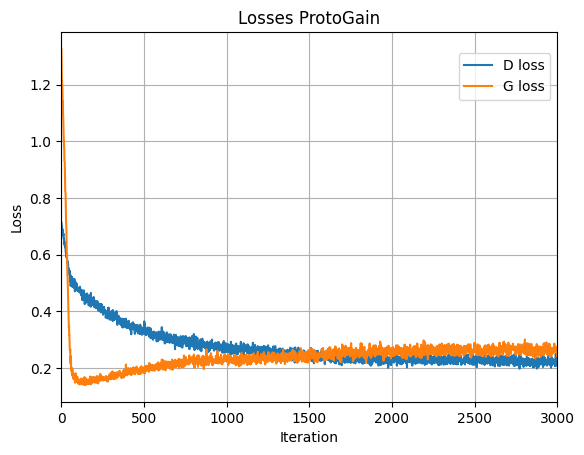

In [10]:
# Plot the D and G losses (Multiple Runs)

xmax = params.num_iterations

fig, axs = plt.subplots()


axs.set_xlabel("Iteration")
axs.set_ylabel("Loss")
axs.set_xlim(0, xmax)
axs.set_title(f"Losses ProtoGain")


axs.fill_between(
    np.arange(1, len(loss_D[0]) + 1, 1),
    loss_D.mean(axis=0) + loss_D.std(axis=0),
    loss_D.mean(axis=0) - loss_D.std(axis=0),
    alpha=0.4,
)
axs.plot(loss_D.mean(axis=0), label="D loss")

axs.fill_between(
    np.arange(1, len(loss_G[0]) + 1, 1),
    loss_G.mean(axis=0) + loss_G.std(axis=0),
    loss_G.mean(axis=0) - loss_G.std(axis=0),
    alpha=0.4,
)
axs.plot(loss_G.mean(axis=0), label="G loss")
axs.xaxis.grid(True, which="major")
axs.yaxis.grid(True, which="major")


fig.legend(loc="upper right", bbox_to_anchor=(0.9, 0.85))

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.05, hspace=0.2)

In [41]:
# Plot the MSE

xmax = params.num_iterations

fig, axs = plt.subplots()


axs.set_xlabel("Iteration")
axs.set_ylabel("MSE")
axs.set_xlim(0, xmax)
axs.set_title(f"MSE ProtoGain")


axs.plot(loss_MSE_train, label="MSE of the NOT missing values")
axs.plot(loss_MSE_test, label="MSE of the missing values")
axs.xaxis.grid(True, which="major")
axs.yaxis.grid(True, which="major")


fig.legend(loc="center right", bbox_to_anchor=(1.05, 0.5))

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.05, hspace=0.2)

# Show the plot
plt.show()

KeyboardInterrupt: 

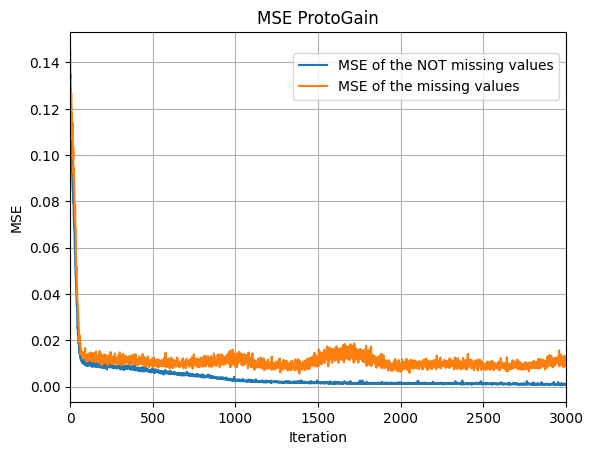

In [12]:
# Plot the MSE (Multiple runs)

xmax = params.num_iterations

fig, axs = plt.subplots()


axs.set_xlabel("Iteration")
axs.set_ylabel("MSE")
axs.set_xlim(0, xmax)
axs.set_title(f"MSE ProtoGain")

axs.fill_between(
    np.arange(1, len(loss_MSE_train[0]) + 1, 1),
    loss_MSE_train.mean(axis=0) + loss_MSE_train.std(axis=0),
    loss_MSE_train.mean(axis=0) - loss_MSE_train.std(axis=0),
    alpha=0.4,
)
axs.plot(loss_MSE_train.mean(axis=0), label="MSE of the NOT missing values")

axs.fill_between(
    np.arange(1, len(loss_MSE_test[0]) + 1, 1),
    loss_MSE_test.mean(axis=0) + loss_MSE_test.std(axis=0),
    loss_MSE_test.mean(axis=0) - loss_MSE_test.std(axis=0),
    alpha=0.4,
)
axs.plot(loss_MSE_test.mean(axis=0), label="MSE of the missing values")


axs.xaxis.grid(True, which="major")
axs.yaxis.grid(True, which="major")
fig.legend(loc="upper right", bbox_to_anchor=(0.9, 0.85))

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.05, hspace=0.2)

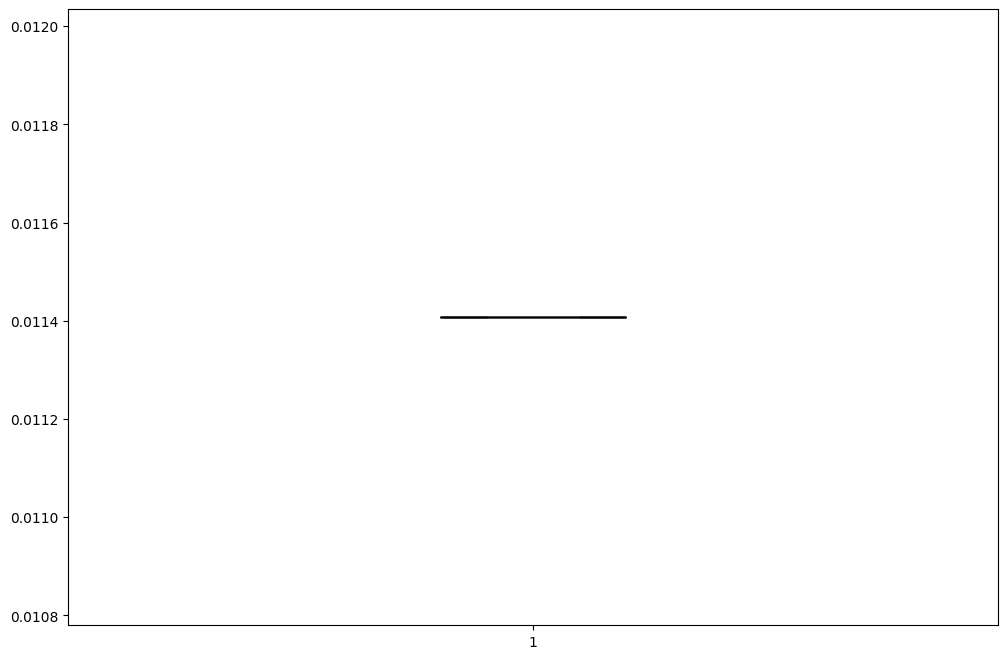

In [13]:
# Final MSE

space = 0.15
fig, ax = plt.subplots(figsize=(12, 8))

box_param = dict(
    whis=(5, 95),
    widths=0.2,
    patch_artist=True,
    flierprops=dict(marker=".", markeredgecolor="black", fillstyle=None),
    notch=True,
    medianprops=dict(color="black"),
)


bp1 = ax.boxplot(
    MSE_final,
    boxprops=dict(facecolor="tab:blue"),
    **box_param,
)

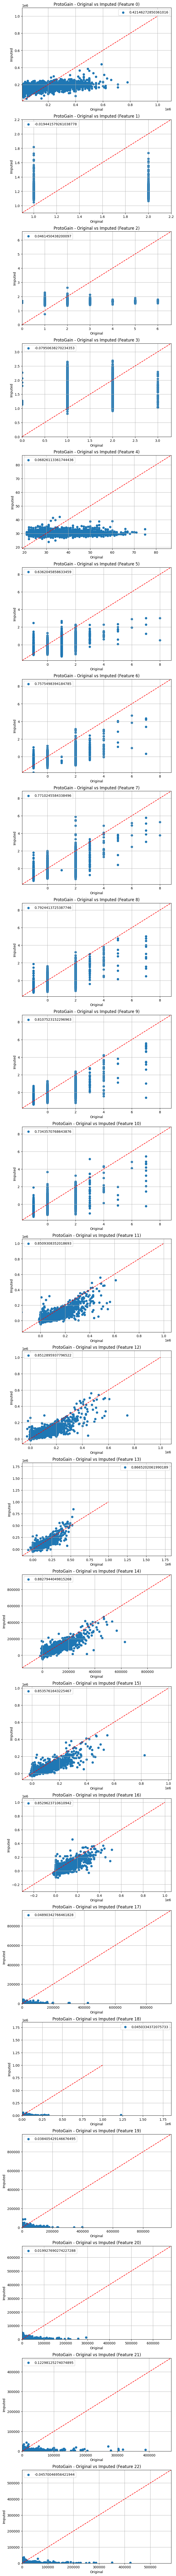

In [14]:
# Original VS Imputed

xlim = 1000000


x = np.linspace(-xlim, xlim, 100)
y = x


df_data = pd.read_csv(params.ref).values

df_missing = pd.read_csv(params.input).values

df_imputed = pd.read_csv(params.output_folder + f"{params.output}.csv").values


zeros = np.where(np.isnan(df_missing))

features = np.arange(len(df_data[0]))
# features = np.array([0, 1])

corr = np.empty(len(df_data[0]))

fig, axs = plt.subplots(len(features), figsize=(8, len(df_data[0]) * 6))

for feature in features:

    xmin = df_data[:, feature].min()
    xmax = df_data[:, feature].max()

    ymin = df_imputed[:, feature].min()
    ymax = df_imputed[:, feature].max()

    zeros_0 = []
    for i in range(len(zeros[0])):
        if zeros[1][i] == feature:
            zeros_0.append(zeros[0][i])

    corr[feature] = np.corrcoef(
        df_data[zeros_0, feature], df_imputed[zeros_0, feature]
    )[0, 1]

    axs[feature].plot(x, y, color="red", linestyle="--")
    axs[feature].scatter(
        df_data[zeros_0, feature], df_imputed[zeros_0, feature], label=corr[feature]
    )
    axs[feature].set_xlabel("Original")
    axs[feature].set_ylabel("Imputed")
    axs[feature].set_xlim(xmin * 0.9, xmax * 1.1)
    axs[feature].legend()  # Add this line to show the label on the graph
    axs[feature].set_ylim(xmin * 0.9, xmax * 1.1)
    axs[feature].set_title(f"ProtoGain - Original vs Imputed (Feature {feature})")
    axs[feature].xaxis.grid(True, which="major")
    axs[feature].yaxis.grid(True, which="major")

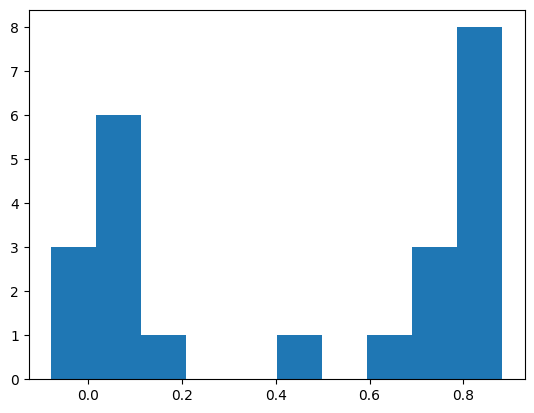

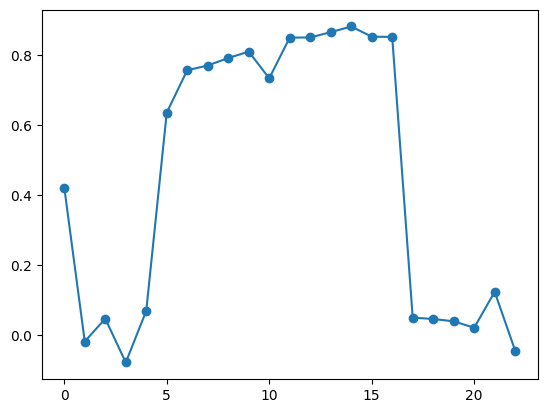

In [15]:
plt.hist(corr)

plt.figure()
plt.plot(corr, marker="o", linestyle="-")

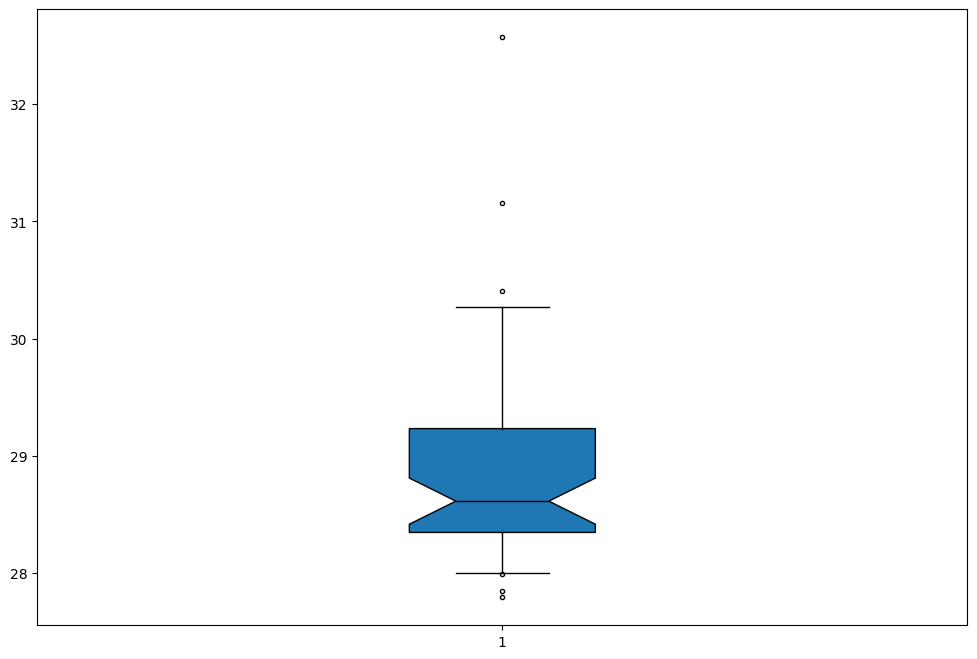

In [64]:
# Boxplot of each run duration

space = 0.15
fig, ax = plt.subplots(figsize=(12, 8))

box_param = dict(
    whis=(5, 95),
    widths=0.2,
    patch_artist=True,
    flierprops=dict(marker=".", markeredgecolor="black", fillstyle=None),
    notch=True,
    medianprops=dict(color="black"),
)


bp1 = ax.boxplot(
    run_time,
    boxprops=dict(facecolor="tab:blue"),
    **box_param,
)

ValueError: x and y must have same first dimension, but have shapes (20,) and (30, 1)

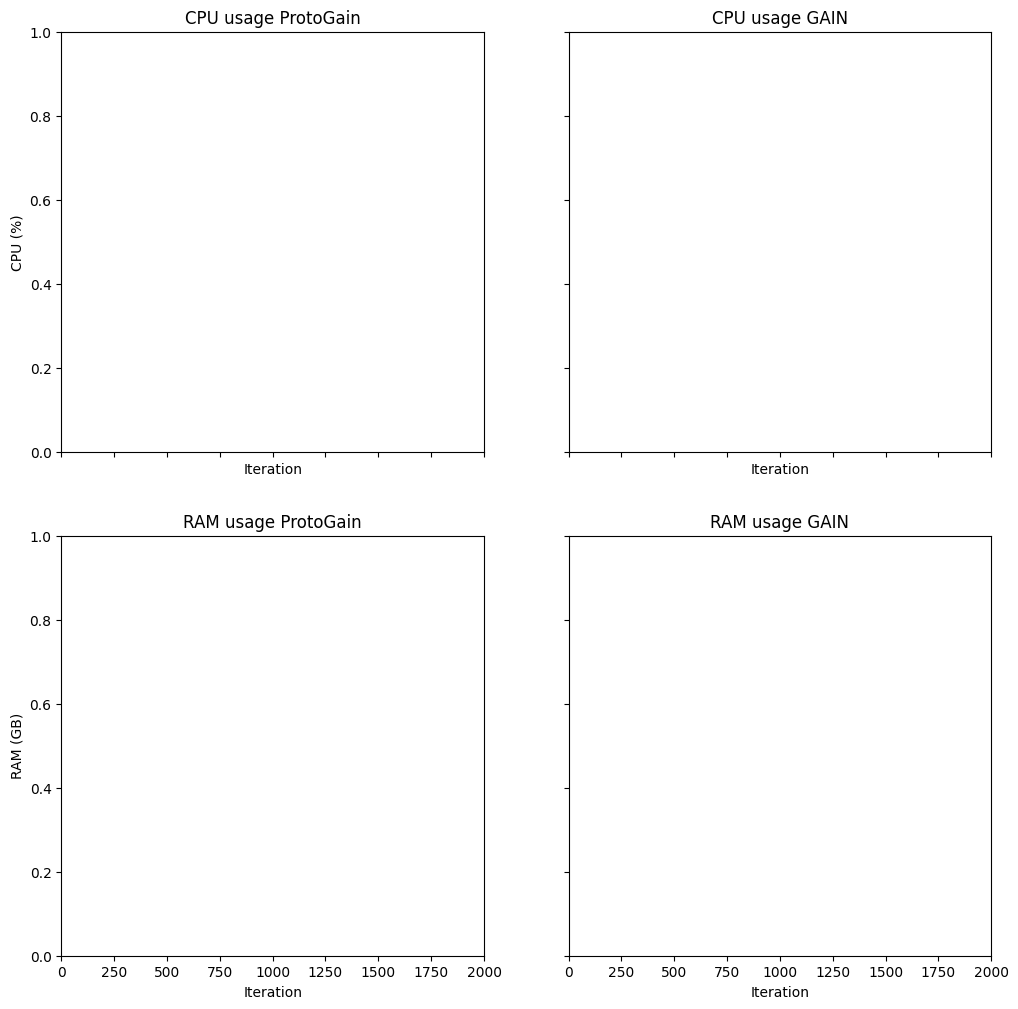

In [113]:
# CPU and RAM

xmax = params.num_epochs

fig, axs = plt.subplots(2, 2, figsize=(12, 12), sharex=True, sharey="row")

# Set the labels and limits for Loss D
axs[0, 0].set_xlabel("Iteration")
axs[0, 0].set_ylabel("CPU (%)")
axs[0, 0].set_xlim(0, xmax)
axs[0, 0].set_title(f"CPU usage ProtoGain")

# Set the labels and limits for Loss G
axs[0, 1].set_xlabel("Iteration")
axs[0, 1].set_title(f"CPU usage GAIN")


axs[1, 0].set_xlabel("Iteration")
axs[1, 0].set_ylabel("RAM (GB)")
axs[1, 0].set_title(f"RAM usage ProtoGain")
axs[1, 1].set_xlabel("Iteration")
axs[1, 1].set_title(f"RAM usage GAIN")


x_ticks = range(0, xmax, 100)


# Create a color gradient based on the loop index
colors = np.linspace(0, 1, len(train_samples))

for i, samples in enumerate(train_samples):
    runs_cpu = {run: data for (s, run), data in my_cpu.items() if s == samples}
    runs_cpu_array = np.array(list(runs_cpu.values()))
    mean_runs_cpu = np.mean(runs_cpu_array, axis=0)
    std_runs_cpu = np.std(runs_cpu_array, axis=0)

    # Use the color gradient for the plot
    axs[0, 0].plot(
        x_ticks, mean_runs_cpu, label=f"{samples} samples", c=plt.cm.viridis(colors[i])
    )
    axs[0, 0].fill_between(
        np.arange(1, len(mean_runs_cpu) + 1, 1),
        mean_runs_cpu[:, 0] + std_runs_cpu[:, 0],
        mean_runs_cpu[:, 0] - std_runs_cpu[:, 0],
        alpha=0.4,
        color=plt.cm.viridis(colors[i]),
    )
    axs[0, 0].xaxis.grid(True, which="major")
    axs[0, 0].yaxis.grid(True, which="major")

    runs_cpu = {run: data for (s, run), data in gain_cpu.items() if s == samples}
    runs_cpu_array = np.array(list(runs_cpu.values()))
    mean_runs_cpu = np.mean(runs_cpu_array, axis=0)
    std_runs_cpu = np.std(runs_cpu_array, axis=0)

    # Use the color gradient for the plot

    axs[0, 1].plot(x_ticks, mean_runs_cpu, c=plt.cm.viridis(colors[i]))
    axs[0, 1].fill_between(
        np.arange(1, len(mean_runs_cpu) + 1, 1),
        mean_runs_cpu[:, 0] + std_runs_cpu[:, 0],
        mean_runs_cpu[:, 0] - std_runs_cpu[:, 0],
        alpha=0.4,
        color=plt.cm.viridis(colors[i]),
    )
    axs[0, 1].xaxis.grid(True, which="major")
    axs[0, 1].yaxis.grid(True, which="major")

    runs_ram = {run: data for (s, run), data in my_ram.items() if s == samples}
    runs_ram_array = np.array(list(runs_ram.values()))
    mean_runs_ram = np.mean(runs_ram_array, axis=0)
    std_runs_ram = np.std(runs_ram_array, axis=0)

    axs[1, 0].plot(x_ticks, mean_runs_ram, c=plt.cm.viridis(colors[i]))
    axs[1, 0].fill_between(
        np.arange(1, len(mean_runs_ram) + 1, 1),
        mean_runs_ram[:, 0] + std_runs_ram[:, 0],
        mean_runs_ram[:, 0] - std_runs_ram[:, 0],
        alpha=0.4,
        color=plt.cm.viridis(colors[i]),
    )
    axs[1, 0].xaxis.grid(True, which="major")
    axs[1, 0].yaxis.grid(True, which="major")

    runs_ram = {run: data for (s, run), data in gain_ram.items() if s == samples}
    runs_ram_array = np.array(list(runs_ram.values()))
    mean_runs_ram = np.mean(runs_ram_array, axis=0)
    std_runs_ram = np.std(runs_ram_array, axis=0)

    axs[1, 1].plot(x_ticks, mean_runs_ram, c=plt.cm.viridis(colors[i]))
    axs[1, 1].fill_between(
        np.arange(1, len(mean_runs_ram) + 1, 1),
        mean_runs_ram[:, 0] + std_runs_ram[:, 0],
        mean_runs_ram[:, 0] - std_runs_ram[:, 0],
        alpha=0.4,
        color=plt.cm.viridis(colors[i]),
    )
    axs[1, 1].xaxis.grid(True, which="major")
    axs[1, 1].yaxis.grid(True, which="major")


fig.legend(loc="center right", bbox_to_anchor=(1.05, 0.5))

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.05, hspace=0.2)

# Show the plot
plt.show()